Index by group in Python vs PQ  
Problem-based: What does Excel not do that you'd like? What brought you to this?  
I'll have examples ready  
What are the short/medium/long-term wins from this?  


## Read from a database
While I understand they won't be using SQL, I would like to show that Python is the "glue that binds" applications and how interoperable it is with so many programs.

Also, Python is exceptional at working programatically with not just data but _metadata_; this is an afterthought with most BI systems.

In [1]:
import sqlite3
import pandas as pd
import seaborn as sns
import os

In [2]:
# Is this a file?
os.path.isfile('lahman.sqlite')

True

In [3]:
# Connect to the database
con = sqlite3.connect('lahman.sqlite')

In [4]:
# Write tables out to a DataFrame
table_query = "SELECT name FROM sqlite_master WHERE type='table';"

Want a static list of all tables in a database? Good luck doing this with a BI tool

In [5]:
list_tables = pd.read_sql_query(table_query, con)
list_tables

name
0           allstarfull
1           appearances
2        awardsmanagers
3         awardsplayers
4   awardssharemanagers
5    awardsshareplayers
6               batting
7           battingpost
8        collegeplaying
9             divisions
10             fielding
11           fieldingof
12      fieldingofsplit
13         fieldingpost
14           halloffame
15            homegames
16              leagues
17             managers
18         managershalf
19                parks
20               people
21             pitching
22         pitchingpost
23             salaries
24              schools
25           seriespost
26                teams
27      teamsfranchises
28            teamshalf

## Payroll analysis

The `salary` table has MLB salaries since 1985. 

Perhaps seeing SQL will excite those who know SQL that they can use it, and those who don't to learn

In [6]:
# Read from one of them


salary_query = 'SELECT * FROM salaries;'
salaries = pd.read_sql_query(salary_query, con)
salaries.head()

ID  yearID teamID  team_ID lgID   playerID    salary
0   1    1985    ATL     1918   NL  barkele01  870000.0
1   2    1985    ATL     1918   NL  bedrost01  550000.0
2   3    1985    ATL     1918   NL  benedbr01  545000.0
3   4    1985    ATL     1918   NL   campri01  633333.0
4   5    1985    ATL     1918   NL  ceronri01  625000.0

The `salary` table is using unique identifiers for players and teams so we will want to merge those in from other tables...

In [7]:
# Who are these players?

people_query = 'SELECT * FROM people;'

## The `people` table

Here's a possible place to work with dates if you'd like...
This has a lot of potential for pulling min/max records, frequency counts, missing values, unit conversion, etc, etc

In [8]:
# Insert live-coding here? 
people = pd.read_sql_query(people_query, con)
people.head()

playerID  birthYear  birthMonth  birthDay birthCountry birthState  \
0  aardsda01     1981.0        12.0      27.0          USA         CO   
1  aaronha01     1934.0         2.0       5.0          USA         AL   
2  aaronto01     1939.0         8.0       5.0          USA         AL   
3   aasedo01     1954.0         9.0       8.0          USA         CA   
4   abadan01     1972.0         8.0      25.0          USA         FL   

    birthCity  deathYear  deathMonth  deathDay  ... bats throws       debut  \
0      Denver        NaN         NaN       NaN  ...    R      R  2004-04-06   
1      Mobile        NaN         NaN       NaN  ...    R      R  1954-04-13   
2      Mobile     1984.0         8.0      16.0  ...    R      R  1962-04-10   
3      Orange        NaN         NaN       NaN  ...    R      R  1977-07-26   
4  Palm Beach        NaN         NaN       NaN  ...    L      L  2001-09-10   

    finalGame   retroID    bbrefID  birth_date  debut_date finalgame_date  \
0  2015-08-23  aardd001  aardsda01  1981-12-27  2004-04-06     2015-08-23   
1  1976-10-03  aaroh101  aaronha01  1934-02-05  1954-04-13     1976-10-03   
2  1971-09-26  aarot101  aaronto01  1939-08-05  1962-04-10     1971-09-26   
3  1990-10-03  aased001   aasedo01  1954-09-08  1977-07-26     1990-10-03   
4  2006-04-13  abada001   abadan01  1972-08-25  2001-09-10     2006-04-13   

   death_date  
0        None  
1        None  
2  1984-08-16  
3        None  
4        None  

[5 rows x 28 columns]

In [9]:
people.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19878 entries, 0 to 19877
Data columns (total 28 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   playerID        19878 non-null  object 
 1   birthYear       19763 non-null  float64
 2   birthMonth      19594 non-null  float64
 3   birthDay        19452 non-null  float64
 4   birthCountry    19816 non-null  object 
 5   birthState      19340 non-null  object 
 6   birthCity       19704 non-null  object 
 7   deathYear       9757 non-null   float64
 8   deathMonth      9756 non-null   float64
 9   deathDay        9755 non-null   float64
 10  deathCountry    9755 non-null   object 
 11  deathState      9706 non-null   object 
 12  deathCity       9750 non-null   object 
 13  nameFirst       19841 non-null  object 
 14  nameLast        19878 non-null  object 
 15  nameGiven       19841 non-null  object 
 16  weight          19060 non-null  float64
 17  height          19141 non-null 

Easily scan missing or problematic data -- BI tools are getting better at data profiling but still not that great...

In [10]:
# How many are missing?
people.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19878 entries, 0 to 19877
Data columns (total 28 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   playerID        19878 non-null  object 
 1   birthYear       19763 non-null  float64
 2   birthMonth      19594 non-null  float64
 3   birthDay        19452 non-null  float64
 4   birthCountry    19816 non-null  object 
 5   birthState      19340 non-null  object 
 6   birthCity       19704 non-null  object 
 7   deathYear       9757 non-null   float64
 8   deathMonth      9756 non-null   float64
 9   deathDay        9755 non-null   float64
 10  deathCountry    9755 non-null   object 
 11  deathState      9706 non-null   object 
 12  deathCity       9750 non-null   object 
 13  nameFirst       19841 non-null  object 
 14  nameLast        19878 non-null  object 
 15  nameGiven       19841 non-null  object 
 16  weight          19060 non-null  float64
 17  height          19141 non-null 

In [11]:
# Describe the data
people.describe()

birthYear    birthMonth      birthDay    deathYear   deathMonth  \
count  19763.000000  19594.000000  19452.000000  9757.000000  9756.000000   
mean    1933.768304      6.627080     15.630681  1965.759250     6.491287   
std       42.485357      3.466562      8.757199    32.678973     3.532180   
min     1820.000000      1.000000      1.000000  1872.000000     1.000000   
25%     1896.000000      4.000000      8.000000  1943.000000     3.000000   
50%     1941.000000      7.000000     16.000000  1968.000000     6.000000   
75%     1972.000000     10.000000     23.000000  1993.000000    10.000000   
max     2000.000000     12.000000     31.000000  2020.000000    12.000000   

          deathDay        weight        height  
count  9755.000000  19060.000000  19141.000000  
mean     15.540543    187.167104     72.326629  
std       8.779454     21.944565      2.612004  
min       1.000000     65.000000     43.000000  
25%       8.000000    170.000000     71.000000  
50%      15.000000    185.000000     72.000000  
75%      23.000000    200.000000     74.000000  
max      31.000000    320.000000     83.000000

Basic dataviz and analysis -- looks like they're learning matplotlib, can translate these from seaborn

<AxesSubplot:xlabel='height', ylabel='weight'>

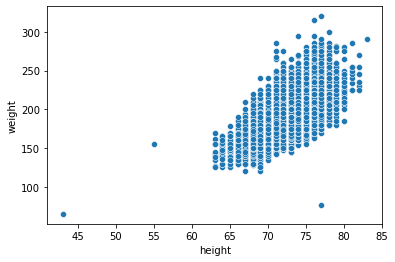

In [12]:
sns.scatterplot(x='height', y='weight', data=people)

No non-reproducible point/clicking to sort or filter to view extreme records -- just write a line of code that is not anything more advanced than would be in Excel.

In [13]:
people.query('(height < 60) or (weight < 100)')

playerID  birthYear  birthMonth  birthDay birthCountry birthState  \
6065   gaedeed01     1925.0         6.0       8.0          USA         IL   
7637   healeto01     1853.0         NaN       NaN          USA         RI   
17038  stallja01     1989.0        12.0      22.0          USA         KS   

      birthCity  deathYear  deathMonth  deathDay  ...  bats throws  \
6065    Chicago     1961.0         6.0      18.0  ...     R      L   
7637   Cranston     1891.0         2.0       6.0  ...  None      R   
17038  Lawrence        NaN         NaN       NaN  ...     R      R   

            debut   finalGame   retroID    bbrefID  birth_date  debut_date  \
6065   1951-08-19  1951-08-19  gaede101  gaedeed01  1925-06-08  1951-08-19   
7637   1878-06-13  1878-09-09  healt101  healeto01        None  1878-06-13   
17038  2016-06-19  2019-09-29  stalj001  stallja01  1989-12-22  2016-06-19   

      finalgame_date  death_date  
6065      1951-08-19  1961-06-18  
7637      1878-09-09  1891-02-06  
17038     2019-09-29        None  

[3 rows x 28 columns]

Time to roll out the big potatoes for profiling

In [14]:
from pandas_profiling import ProfileReport
ProfileReport(people)

Summarize dataset:   0%|          | 0/42 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [15]:
# Grab the name and ID
people_names = people[['playerID', 'nameFirst', 'nameLast']]
people_names.head()

playerID nameFirst nameLast
0  aardsda01     David  Aardsma
1  aaronha01      Hank    Aaron
2  aaronto01    Tommie    Aaron
3   aasedo01       Don     Aase
4   abadan01      Andy     Abad

Doing a lot of merging here... hope that's OK 😉

In [16]:
# Merge these datasets -- left outer join 
# (Like VLOOKUP)

salaries_merged = salaries.merge(people_names, how='left')
salaries_merged.shape

(26428, 9)

In [17]:
salaries.shape

(26428, 7)

In [18]:
salaries_merged.head()

ID  yearID teamID  team_ID lgID   playerID    salary nameFirst   nameLast
0   1    1985    ATL     1918   NL  barkele01  870000.0       Len     Barker
1   2    1985    ATL     1918   NL  bedrost01  550000.0     Steve  Bedrosian
2   3    1985    ATL     1918   NL  benedbr01  545000.0     Bruce   Benedict
3   4    1985    ATL     1918   NL   campri01  633333.0      Rick       Camp
4   5    1985    ATL     1918   NL  ceronri01  625000.0      Rick     Cerone

More plotting and customization -- Excel really struggles at on the fly data visualization and Power BI/Tableau make interactive visuals but they are not reproducible and lack the statistical layers that you can get with Python

<AxesSubplot:xlabel='yearID', ylabel='salary'>

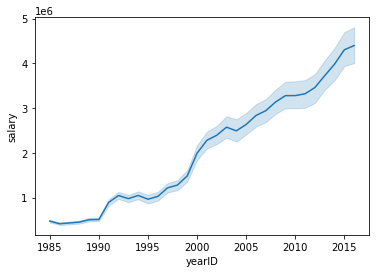

In [19]:
sns.lineplot(x='yearID', y='salary', data=salaries_merged)

<AxesSubplot:xlabel='yearID', ylabel='salary'>

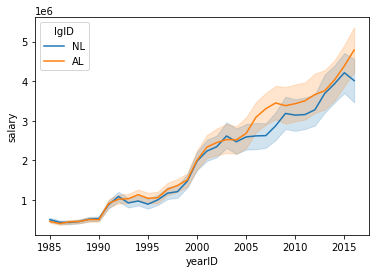

In [20]:
sns.lineplot(x='yearID', y='salary', hue='lgID', data=salaries_merged)

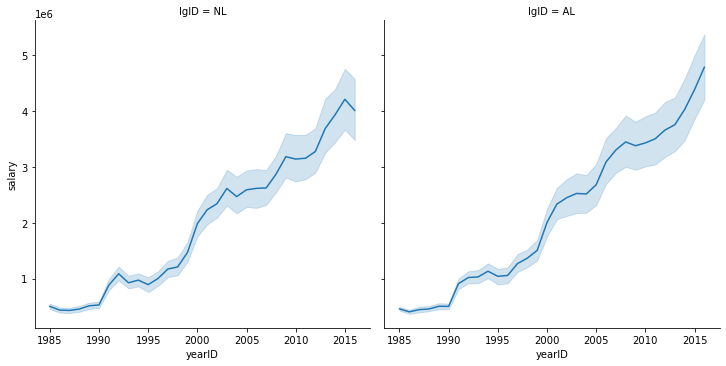

In [21]:
sns.relplot(data=salaries_merged, x='yearID', y='salary', col='lgID', kind='line')

Dirty data -- a player can play for more than one team in a season, so we need to aggregate this data by player and year to get annual salaries by player.

In [22]:
# Total annual salary
player_salaries = salaries_merged[['playerID', 'nameFirst', 'nameLast', 'yearID', 'salary']]
annual_salaries = player_salaries.groupby(['playerID','nameFirst','nameLast','yearID'], as_index=False).sum('salary')
annual_salaries.head()

playerID nameFirst nameLast  yearID     salary
0  aardsda01     David  Aardsma    2004   300000.0
1  aardsda01     David  Aardsma    2007   387500.0
2  aardsda01     David  Aardsma    2008   403250.0
3  aardsda01     David  Aardsma    2009   419000.0
4  aardsda01     David  Aardsma    2010  2750000.0

What are the most expensive season salaries ever?

In [23]:
# Most expensive single season salaries
top_salaries = player_salaries.nlargest(10, 'salary')
top_salaries.sort_values(by='salary', inplace=True, ascending=False)
top_salaries

playerID nameFirst   nameLast  yearID      salary
20286  rodrial01      Alex  Rodriguez    2009  33000000.0
21109  rodrial01      Alex  Rodriguez    2010  33000000.0
25965  kershcl01   Clayton    Kershaw    2016  33000000.0
25131  kershcl01   Clayton    Kershaw    2015  32571000.0
21945  rodrial01      Alex  Rodriguez    2011  32000000.0
25588  greinza01      Zack    Greinke    2016  31799030.0
22793  rodrial01      Alex  Rodriguez    2012  30000000.0
25673  priceda01     David      Price    2016  30000000.0
23616  rodrial01      Alex  Rodriguez    2013  29000000.0
19461  rodrial01      Alex  Rodriguez    2008  28000000.0

## Payroll vs team metrics

When teams pay more money, do they get more results?

In [24]:
teams_all_query = 'SELECT * FROM teams;'
teams_all = pd.read_sql_query(teams_all_query, con)
teams_all.head()

ID  yearID lgID teamID franchID divID  div_ID  teamRank   G  Ghome  ...  \
0   1    1871   NA    BS1      BNA  None     NaN         3  31    NaN  ...   
1   2    1871   NA    CH1      CNA  None     NaN         2  28    NaN  ...   
2   3    1871   NA    CL1      CFC  None     NaN         8  29    NaN  ...   
3   4    1871   NA    FW1      KEK  None     NaN         7  19    NaN  ...   
4   5    1871   NA    NY2      NNA  None     NaN         5  33    NaN  ...   

   DP     FP                     name                          park  \
0  24  0.834     Boston Red Stockings           South End Grounds I   
1  16  0.829  Chicago White Stockings       Union Base-Ball Grounds   
2  15  0.818   Cleveland Forest Citys  National Association Grounds   
3   8  0.803     Fort Wayne Kekiongas                Hamilton Field   
4  14  0.840         New York Mutuals      Union Grounds (Brooklyn)   

  attendance  BPF  PPF  teamIDBR  teamIDlahman45  teamIDretro  
0        NaN  103   98       BOS             BS1          BS1  
1        NaN  104  102       CHI             CH1          CH1  
2        NaN   96  100       CLE             CL1          CL1  
3        NaN  101  107       KEK             FW1          FW1  
4        NaN   90   88       NYU             NY2          NY2  

[5 rows x 50 columns]

In [25]:
teams_all.columns

Index(['ID', 'yearID', 'lgID', 'teamID', 'franchID', 'divID', 'div_ID',
       'teamRank', 'G', 'Ghome', 'W', 'L', 'DivWin', 'WCWin', 'LgWin', 'WSWin',
       'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'CS', 'HBP', 'SF',
       'RA', 'ER', 'ERA', 'CG', 'SHO', 'SV', 'IPouts', 'HA', 'HRA', 'BBA',
       'SOA', 'E', 'DP', 'FP', 'name', 'park', 'attendance', 'BPF', 'PPF',
       'teamIDBR', 'teamIDlahman45', 'teamIDretro'],
      dtype='object')

In [26]:
# Group salaries by team this time
payroll = salaries.groupby(['yearID', 'teamID'], as_index=False).sum('salary')
payroll.head()

yearID teamID    ID  team_ID      salary
0    1985    ATL   253    42196  14807000.0
1    1985    BAL   737    42218  11560712.0
2    1985    BOS  1425    48000  10897560.0
3    1985    CAL  2338    53788  14427894.0
4    1985    CHA  2268    40362   9846178.0

In [27]:
# Merge with select columns 
payroll_merged = teams_all[['yearID','teamID','name','attendance', 'W']].merge(payroll, how='right')
payroll_merged.head()

yearID teamID               name  attendance   W    ID  team_ID      salary
0    1985    ATL     Atlanta Braves   1350137.0  66   253    42196  14807000.0
1    1985    BAL  Baltimore Orioles   2132387.0  83   737    42218  11560712.0
2    1985    BOS     Boston Red Sox   1786633.0  81  1425    48000  10897560.0
3    1985    CAL  California Angels   2567427.0  90  2338    53788  14427894.0
4    1985    CHA  Chicago White Sox   1669888.0  85  2268    40362   9846178.0

<AxesSubplot:xlabel='salary', ylabel='attendance'>

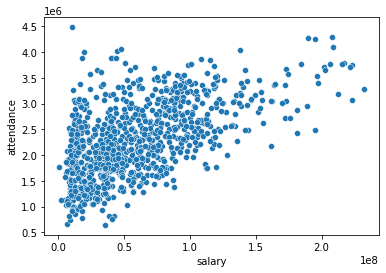

In [28]:
sns.scatterplot(x='salary', y='attendance', data=payroll_merged)

Is there a relationship to wins?

<AxesSubplot:xlabel='salary', ylabel='W'>

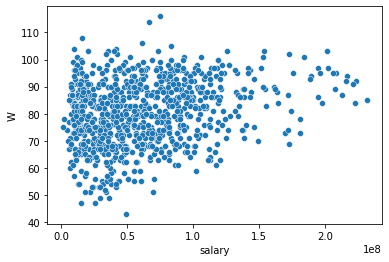

In [29]:
sns.scatterplot(x='salary', y='W', data=payroll_merged)

 ## TBD...
 
 From here depending on time and need, etc. we could maybe get into some Excel automation, how to pump this stuff out to Excel and clean up the output from Python.
 
Could also do a bit of API or web scraping [of MLB records](https://pythonrepo.com/repo/zachpanz88-mlbgame-python-third-party-apis-wrappers) which could be good practice for working with loops or UDFs. Since everything here is being done so far in Pandas there's not a lot of opportunity for that. 

Or a bit of sentiment analysis or otherwise show them that Python can handle unstructured data where most BI tools would fail.

## Team report

In [30]:
reds_payroll = payroll_merged.query('name == "Cincinnati Reds"')


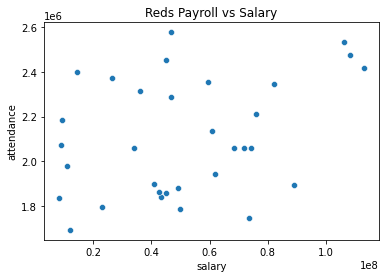

In [31]:
import matplotlib.pyplot as plt

# 1. Set Pandas engine to xlsxwriter
writer = pd.ExcelWriter('payroll.xlsx', engine='xlsxwriter')

# 2. Convert the dataframe to an XlsxWriter Excel object.
reds_payroll.to_excel(writer, sheet_name='Sheet1', index=False)

# 3. Get the xlsxwriter objects from the DataFrame writer object.
workbook  = writer.book
worksheet = writer.sheets['Sheet1']

sns.scatterplot(x='salary', y='attendance', data=reds_payroll)
plt.title('Reds Payroll vs Salary')

# Save the image
plt.savefig('payroll.png', dpi = (300))

# Add the image to the workbook
worksheet.insert_image('G20', 'payroll.png')

# Close workbook
workbook.close()